<a href="https://colab.research.google.com/github/Jhansipothabattula/Machine_Learning/blob/main/Day50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent and Optimization Techniques


**Gradient Descent and Its Variants**

• **What is Gradient Descent?**

 • Optimization algorithm used to minimize the loss function by iteratively adjusting the model's parameters in the direction of the negative gradient

• **Variants of Gradient Descent**

 • **Batch Gradient Descent**

  • Uses the entire dataset to compute gradients at each step

  • Pros: Accurate gradients

  • Cons: Computationally expensive for large datasets

 • **Stochastic Gradient Descent (SGD)**

  • Updates parameters using one data point at a time

  • Pros: Faster updates

  • Cons: High variance in updates; can lead to oscillations

 • **Mini-batch Gradient Descent**

  • Updates parameters using a small subset (batch) of the dataset

  • Pros: Combines the efficiency of SGD with the stability of Batch Gradient Descent



**Advanced Optimization Techniques**

• **Adagrad**

 • Adapts learning rates for each parameter by scaling inversely with the sum of gradients squared

 • Pros: Suitable for sparse data

 • Cons: Learning rate decreases too aggressively over time

• **RMSprop**

 • Modifies Adagrad by using an exponentially weighted moving average of squared gradients

 • Pros: Addresses Adagrad’s aggressive learning rate decay; works well for non-convex problems

• **Adam (Adaptive Moment Estimation)**

 • Combines momentum and RMSprop to adapt learning rates for each parameter

 • Pros: Works well in practice for most problems; computationally efficient



**Importance of Learning Rate and Choosing the Right Optimizer**

**• Learning Rate**

• Determines the step size for parameter updates

• Too High: May overshoot the minimum or cause divergence

• Too Low: Leads to slow convergence

**• Choosing the Right Optimizer**

• SGD: Works well for simple, convex problems

• Adam: Generally performs well across tasks

• RMSprop: Often preferred for RNNs and sequence-based tasks


**Objective**

- Implement gradient descent to update model weights and experiment with different optimizers using Tensorflow and/or PyTorch

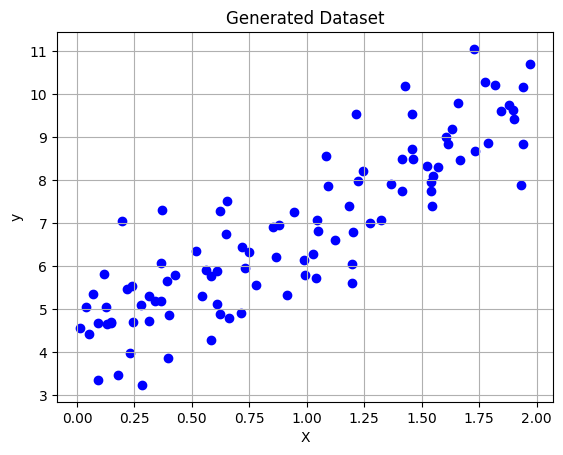

Optimized Parameters (Theta): 
 [[4.21509616]
 [2.77011339]]
Epoch 0, Loss: 52.6120
Epoch 100, Loss: 0.8086
Epoch 200, Loss: 0.8066
Epoch 300, Loss: 0.8066
Epoch 400, Loss: 0.8066
Epoch 500, Loss: 0.8066
Epoch 600, Loss: 0.8066
Epoch 700, Loss: 0.8066
Epoch 800, Loss: 0.8066
Epoch 900, Loss: 0.8066
Epoch0, Loss:80.0829
Epoch10, Loss:48.3600
Epoch20, Loss:25.7928
Epoch30, Loss:11.8723
Epoch40, Loss:4.7293
Epoch50, Loss:1.8614
Epoch60, Loss:1.0589
Epoch70, Loss:0.9491
Epoch80, Loss:0.9546
Epoch90, Loss:0.9432


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Visualize data
plt.scatter(X, y, color="blue")
plt.title("Generated Dataset")
plt.xlabel('X')
plt.ylabel('y')
plt.grid()
plt.show()

# Initialize Parameters
m = 100
theta = np.random.rand(2, 1)
learning_rate = 0.1
iterations = 1000

# Add bias term to X
x_b = np.c_[np.ones((m, 1)), X]

# Gradient Descent
for iteration in range(iterations):
  gradients = 2/m * x_b.T.dot(x_b.dot(theta) - y)
  theta = theta - learning_rate * gradients

print("Optimized Parameters (Theta): \n", theta)

import tensorflow as tf

# Prepare Data
X_tensor = tf.constant(X, dtype=tf.float32)
y_tensor = tf.constant(y, dtype=tf.float32)

# Define model
class LinearModel(tf.Module):  # Corrected from tf.module to tf.Module
  def __init__(self):
    super().__init__() # Call the base class constructor
    self.theta = tf.Variable(tf.random.normal(([1]))) # Initializing theta for single feature
    self.bias = tf.Variable(tf.random.normal(([1])))  # Initializing bias

  def __call__(self, X):
    return self.theta * X + self.bias

# Define loss function
def mse_loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred)) # Corrected y_predict to y_pred

# Train with SGD
model = LinearModel()
optimizer = tf.optimizers.SGD(learning_rate=0.1)

# Collect trainable variables
trainable_variables = [model.theta, model.bias]

for epoch in range(1000):
  with tf.GradientTape() as tape:
    y_predict = model(X_tensor)
    loss = mse_loss(y_tensor, y_predict)
  gradients = tape.gradient(loss, trainable_variables) # Corrected to use trainable_variables
  optimizer.apply_gradients(zip(gradients, trainable_variables)) # Corrected to use trainable_variables
  if epoch % 100 == 0:
    print(f"Epoch {epoch}, Loss: {loss.numpy():.4f}")

import torch
import torch.nn as nn
import torch.optim as optim

# Prepare data
X_torch = torch.tensor(X, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)

# Define model
class LinearModelTorch(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(1, 1)

  def forward(self, x):
    return self.linear(x)
model_torch = LinearModelTorch()

# Define Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.1)

# Train model
for epoch in range(100):
  optimizer.zero_grad()
  outputs = model_torch(X_torch)
  loss = criterion(outputs, y_torch)
  loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
    print(f"Epoch{epoch}, Loss:{loss.item():.4f}") # Corrected loss.items() to loss.item()